In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from keras import utils
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Максимальное количество слов 
num_words = 1000000
# Максимальная длина обращения
max_len = 20

In [4]:
#Загрузка сета

train = pd.read_table('data/train.tsv', encoding='latin-1', sep='\t', header=None, names=['phrase', 'history', 'binary'])
test = pd.read_table('data/test.tsv', encoding='latin-1', sep='\t', header=None, names=['phrase', 'history', 'binary'])


In [82]:
q = -1
for i in train['binary']:
    q += 1
    if train['binary'][q] == 1:
        print(train['phrase'][q], train['history'][q], train['binary'][q])

    else:
        continue


ну куда пошли [{"user": "", "marusia": ""}, {"user": "", "marusia": ""}, {"user": "", "marusia": ""}, {"user": "", "marusia": ""}, {"user": "", "marusia": ""}] 1
это например муз вот уж не за что [{"user": "какие планы на ближайшие дни", "marusia": "Четверг, 15 сентября — День фетровой шляпы, День худеющих, День пасты Лингвини."}, {"user": "", "marusia": ""}, {"user": "", "marusia": ""}, {"user": "о чем например", "marusia": "Да обо всем, темы неисчерпаемы"}, {"user": "нет да я сам ничего приехал за мир сделали", "marusia": "Это очень смелый поступок. Вы молодец"}] 1
небо голубое солнце золотое [{"user": "", "marusia": ""}, {"user": "", "marusia": ""}, {"user": "привет", "marusia": "Привет!"}, {"user": "привет", "marusia": "Привет-привет!"}, {"user": "включи мне ой", "marusia": "Сейчас я сейчас погодите"}] 1
злая [{"user": "", "marusia": ""}, {"user": "сказала на меня злая сторона быстро быстро", "marusia": "Ну почему же злая?"}, {"user": "да ты не понимаешь сейчас добрая сторона приде

In [32]:
# Токенезируем текст, делаем словарь

aboba = train['phrase']
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(aboba)
sequences = tokenizer.texts_to_sequences(aboba)

In [33]:
#Смотрим словарь
print(tokenizer.word_index)

{'ð¼ð°ñ\x80ñ\x83ñ\x81ñ\x8f': 1, 'ñ\x82ñ\x8b': 2, 'ñ\x8f': 3, 'ð°': 4, 'ñ\x87ñ\x82ð¾': 5, 'ð½ðµ': 6, 'ð´ð°': 7, 'ðºð°ðº': 8, 'ð½ñ\x83': 9, 'ñ\x83': 10, 'ñ\x8dñ\x82ð¾': 11, 'ñ\x82ðµð±ñ\x8f': 12, 'ð²': 13, 'ð½ð°': 14, 'ð¸': 15, 'ð¼ðµð½ñ\x8f': 16, 'ð½ðµñ\x82': 17, 'ð¼ð½ðµ': 18, 'ñ\x82ðµð±ðµ': 19, 'ð²ðºð»ñ\x8eñ\x87ð¸': 20, 'ñ\x81': 21, 'ñ\x82ð¾': 22, 'ñ\x81ðºð¾ð»ñ\x8cðºð¾': 23, 'ð´ð°ð²ð°ð¹': 24, 'ð²ñ\x81ðµ': 25, 'ð±ñ\x83ð´ðµñ\x82': 26, 'ð¿ñ\x80ð¸ð²ðµñ\x82': 27, 'ñ\x82ð°ðº': 28, 'ð°ð»ð¸ñ\x81ð°': 29, 'ð¿ð¾ñ\x87ðµð¼ñ\x83': 30, 'ð²ð¾ñ\x82': 31, 'ñ\x81ðµð¹ñ\x87ð°ñ\x81': 32, 'ñ\x81ðºð°ð¶ð¸': 33, 'ðµñ\x81ñ\x82ñ\x8c': 34, 'ð¼ñ\x8b': 35, 'ðµñ\x89ðµ': 36, 'ð·ð½ð°ðµñ\x88ñ\x8c': 37, 'ðºð°ðºð°ñ\x8f': 38, 'ð¼ð°ñ\x80ñ\x83ñ\x81ñ\x8c': 39, 'ð¾ð½ð°': 40, 'ðºñ\x82ð¾': 41, 'ñ\x81ð¿ð°ñ\x81ð¸ð±ð¾': 42, 'ð¸ð»ð¸': 43, 'ð·ð¾ð²ñ\x83ñ\x82': 44, 'ð¶ðµ': 45, 'ðºð¾ð³ð´ð°': 46, 'ñ\x85ð¾ñ\x80ð¾ñ\x88ð¾': 47, 'ð¿ð¾': 48, 'ñ\x83ð¶ðµ': 49, 'ð¿ð¾ð³ð¾ð´ð°': 50, 'ð¿ð¾ñ\x82ð¾ð¼ñ\x83': 51, 'ð¿ñ\x80ð¾ñ\x81ñ\x82ð¾': 52, 'ð·ð½ð°ñ\x8e

In [34]:
x_train = pad_sequences(sequences, maxlen=max_len)
y_train = train['binary']

In [35]:
model = Sequential()
model.add(Dense(1280, activation='relu', input_shape=(max_len,)))
model.add(Dense(640, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [44]:
model_cnn_save_path = 'best_model_cnn.h5'                         # Файл весов
checkpoint_callback_lstm = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [50]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=1,
                    validation_split=0.10)
                    #callbacks=[checkpoint_callback_lstm])

Epoch 1/25
26010/26010 [==============================] - 58s 2ms/step - loss: 0.5848 - accuracy: 0.7896 - val_loss: 0.5266 - val_accuracy: 0.7776
Epoch 2/25
26010/26010 [==============================] - 58s 2ms/step - loss: 0.9897 - accuracy: 0.7893 - val_loss: 0.5272 - val_accuracy: 0.7786
Epoch 3/25
26010/26010 [==============================] - 58s 2ms/step - loss: 1.3235 - accuracy: 0.7903 - val_loss: 0.5289 - val_accuracy: 0.7779
Epoch 4/25
26010/26010 [==============================] - 58s 2ms/step - loss: 0.9655 - accuracy: 0.7900 - val_loss: 0.5282 - val_accuracy: 0.7776
Epoch 5/25
26010/26010 [==============================] - 58s 2ms/step - loss: 0.8924 - accuracy: 0.7899 - val_loss: 0.7311 - val_accuracy: 0.7776
Epoch 6/25
26010/26010 [==============================] - 58s 2ms/step - loss: 1.2403 - accuracy: 0.7897 - val_loss: 0.5285 - val_accuracy: 0.7786
Epoch 7/25
26010/26010 [==============================] - 57s 2ms/step - loss: 0.9330 - accuracy: 0.7895 - val_loss: 0

KeyboardInterrupt: 

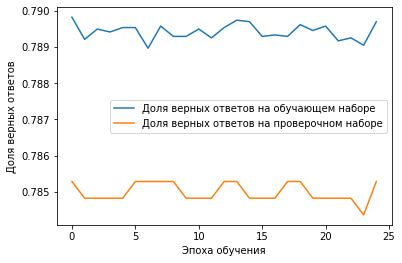

In [49]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()